In [69]:
import numpy as np
import cvxpy as cp
import pandas as pd
import scipy.stats as sps
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm

In [70]:
%load_ext autoreload
%autoreload 2
from data_utils import PATH_HOME, PATH_DATA, CAISO, NODES
from data_utils import readin_caiso_lmp
from battery_utils import get_optimal_battery_schedule, get_limited_optimal_battery_schedule
from plot_utils import set_plt_settings, plot_optimal_performance, plot_optimal_rev_by_duration

set_plt_settings()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# read in data
data = readin_caiso_lmp(market='REAL_TIME_15_MIN', nodes=NODES)
data = data.drop_duplicates().reset_index(drop=True)

['caiso_th_np15_gen-apnd', 'caiso_th_sp15_gen-apnd', 'caiso_mossldb_2_b1', 'caiso_sandlot_2_n022']


100%|█████████████████████████████████████████████| 4/4 [00:03<00:00,  1.10it/s]


In [4]:
durations = [4, 6, 8, 12, 24, 48, 100]
dur = 100
node = NODES[2]
y = 2022
capacity = 200

In [5]:
p = data.lmp[(data.location == node) & (data.year == y)].to_numpy() # prices are $/MWh 

# 0. Naive baseline

* Charge: 12am to 5am
* Discharge 8am to 10am
* Charge: 10am to 4pm
* Discharge: 4pm to 9pm

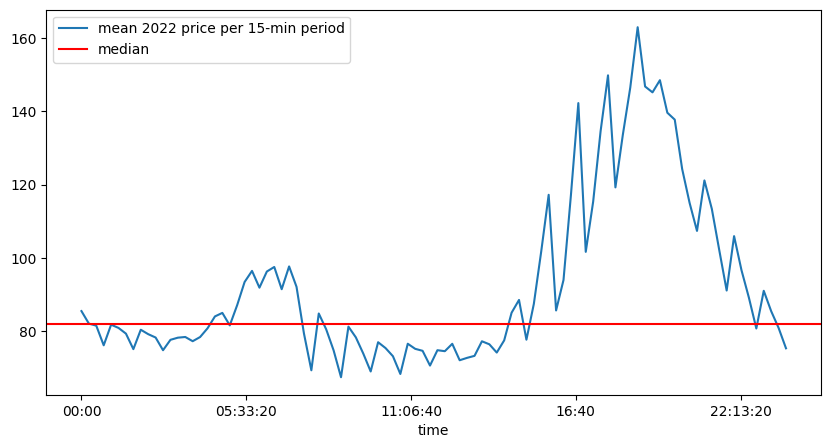

In [57]:
data.loc[:, 'time'] = data.datetime.dt.time
mean_lmp_per_15min = data[(data.location == node) & (data.year == y)].groupby('time')['lmp'].mean()

mean_lmp_per_15min.plot(figsize=(10, 5), label=f'mean {y} price per 15-min period')
plt.axline((0, np.median(mean_lmp_per_15min.values)), slope=0, color='red', label='median')
plt.legend()
plt.show()

# 1. Optimal baseline

In [64]:
e_opt, __, __, revenue_opt = get_optimal_battery_schedule(p, duration=dur, charge_capacity=capacity, storage_start=0, use_efficiency=True)

# 2. Optimal baseline under limited foresight

In [76]:
e_optlim, __, __, revenue_optlim = get_limited_optimal_battery_schedule(days_foresight=10, px=p, duration=dur, charge_capacity=capacity, 
                                                               storage_start=0, use_efficiency=True)

# Summarize

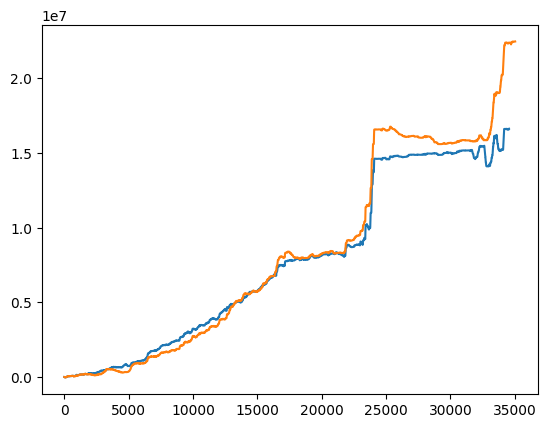

In [77]:
plt.plot(revenue_optlim)
plt.plot(revenue_opt)